In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf
import pandas as pd

In [2]:
loadFolder="E:/nasInhalt/corpora/agender"
saveFolder='C:/Users/lukas/Downloads/TEDLIUM_release1/TEDLIUM_release1/agenderData'

In [3]:
def agenderTxtSummary(file):
    columns = ["filename", "ID", "SpeakerID", "age", "gender"]
    data = pd.read_csv(file, sep=" ", header=None, names = columns)
    speakers = data["SpeakerID"].unique()
    return data


In [4]:
summaryD = agenderTxtSummary("./trainSampleList_devel.txt")
summaryT = agenderTxtSummary("./trainSampleList_train.txt")

In [5]:
len(summaryD) + len(summaryT)

53076

In [6]:
summaryD.head()

filename     ID  SpeakerID  age gender
0   wav_traindevel/1001/2/a11001s1.raw  26176       1001   14      x
1  wav_traindevel/1001/2/a11001s10.raw  59392       1001   14      x
2  wav_traindevel/1001/2/a11001s11.raw  39168       1001   14      x
3  wav_traindevel/1001/2/a11001s12.raw  52224       1001   14      x
4  wav_traindevel/1001/2/a11001s13.raw  46208       1001   14      x

In [7]:
def rawToWav(summary):
    for index, row in summary.iterrows():
        filename = row["filename"];
        ID = row["ID"];
        loadPath = loadFolder + "/" + filename
        sig, fs = sf.read(loadPath, channels=1, samplerate=8000, format='RAW', subtype='PCM_16')
        newFileName = filename.split(".")[0]
        pathParts = newFileName.split("/")
        newFileName = pathParts[-3] + "_" +  pathParts[-2] + "_" + newFileName.split("/")[-1]
        sf.write(saveFolder + '/' + newFileName + ".wav"  , sig, fs)

In [8]:
rawToWav(summaryD)
rawToWav(summaryT)

In [9]:
def createUnifiedSummary(summary):
    for index, row in summary.iterrows():
        filename = row["filename"];
        newFileName = filename.split(".")[0]
        pathParts = newFileName.split("/")
        newFileName = pathParts[-3] + "_" +  pathParts[-2] + "_" + newFileName.split("/")[-1] + ".wav"
        summary.loc[index,"filename"] = newFileName

In [10]:
createUnifiedSummary(summaryD)
createUnifiedSummary(summaryT)

In [11]:
summary = summaryD.append(summaryT)

In [12]:
summary["gender"].unique()

array(['x', 'f', 'm'], dtype=object)

In [13]:
summary.to_csv("./agenderSummary.csv", index=False)

In [14]:
summary.head()

filename     ID  SpeakerID  age gender
0   1001_2_a11001s1.wav  26176       1001   14      x
1  1001_2_a11001s10.wav  59392       1001   14      x
2  1001_2_a11001s11.wav  39168       1001   14      x
3  1001_2_a11001s12.wav  52224       1001   14      x
4  1001_2_a11001s13.wav  46208       1001   14      x

In [15]:
def agenderTxtSummary(file):
    age = []
    gender = []
    columns = ["File_name", "ID", "SpeakerID", "age", "gender"]
    data = pd.read_csv(file, sep=" ", header=None, names = columns)
    speakers = data["SpeakerID"].unique()
    for sp in speakers:
        age.append(data[data["SpeakerID"]==sp]["age"].unique()[0])
        gender.append(data[data["SpeakerID"]==sp]["gender"].unique()[0])
    plt.hist(age)
    plt.show()
    plt.hist(gender)
    plt.show()
    print(len(speakers))
    return data
    

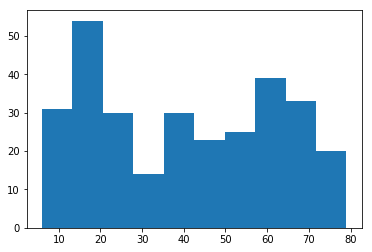

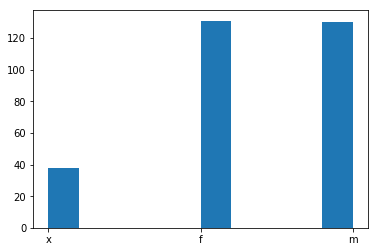

299


In [16]:
data = agenderTxtSummary('trainSampleList_devel.txt')

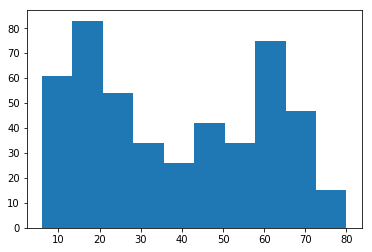

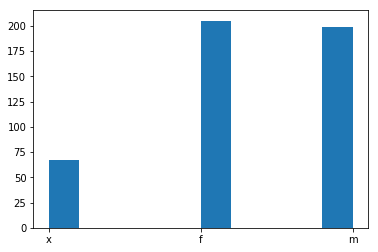

471


In [17]:
data = agenderTxtSummary('trainSampleList_train.txt')